**Разведочный анализ данных (EDA)**

Задача: Определить ключевые факторы, влияющие на кредитоспособность клиентов, чтобы улучшить модель скоринга и уменьшить количество дефолтов.

**Данные:** Данные сформированы на основе датасета из Kaggle-соревнования

LoansData.csv – информация о клиентах банка.

LoansDataDictionary.xlsx – словарь с описанием используемых полей.

**Вывод** в конце ноутбука.

In [32]:
#Импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Основная таблица для работы 
df = pd.read_csv("Downloads/loansdata/LoansData.csv", low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Описание признаков 
data_dict = pd.read_excel("Downloads/loansdata/LoansDataDictionary.xlsx")
data_dict

,Наименование поля,Описание
0,id,Идентификатор записи кредитной истории
1,member_id,Идентификатор заемщика
2,loan_amnt,Запрошенная сумма кредита
3,funded_amnt,Фактическая сумма кредита
4,term,Срок кредита
5,int_rate,Процентная ставка по кредиту
6,installment,Ежемесячный платеж по кредиту
7,grade,Рейтинг кредита
8,sub_grade,Детализированный рейтинг кредита
9,emp_title,Должность заемщика


1. **Понимание структуры и характеристик набора данных**

-*размер набора данных*

-*типы переменных*

-*наличие пропущенных значений и дубликатов*

-*построение распределений переменных*

-*расчет статистических показателей*

In [35]:
print("\nРазмер набора данных:")
df.shape


Размер набора данных:


(887379, 72)

In [36]:
print("\n Информация о типах данных:")
df.info()


 Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               

In [37]:
print("\nОписательная статистика по числовым полям:")
print(df.describe())


Описательная статистика по числовым полям:
                 id     member_id      loan_amnt    funded_amnt  \
count  8.873790e+05  8.873790e+05  887379.000000  887379.000000   
mean   3.246513e+07  3.500182e+07   14755.264605   14741.877625   
std    2.282734e+07  2.411335e+07    8435.455601    8429.897657   
min    5.473400e+04  7.047300e+04     500.000000     500.000000   
25%    9.206643e+06  1.087713e+07    8000.000000    8000.000000   
50%    3.443327e+07  3.709528e+07   13000.000000   13000.000000   
75%    5.490814e+07  5.847135e+07   20000.000000   20000.000000   
max    6.861706e+07  7.354484e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    887379.000000  887379.000000  887379.000000  8.873750e+05   
mean      14702.464383      13.246740     436.717127  7.502759e+04   
std        8442.106732       4.381867     244.186593  6.469830e+04   
min           0.000000       5.320000      15.670000  0.000000e+00   
25

In [38]:
#Доли для различных групп заявок
group_shares = df["application_type"].value_counts(normalize=True) * 100
group_shares

application_type
INDIVIDUAL    99.942415
JOINT          0.057585
Name: proportion, dtype: float64

In [39]:
#Удалю из выборки записи той группы, чья доля меньше 5% от общего количества записей
valid_groups = group_shares[group_shares >= 0.05].index
valid_groups

Index(['INDIVIDUAL', 'JOINT'], dtype='object', name='application_type')

In [40]:
# Доля пропусков по каждому столбцу
missing = df.isna().mean().sort_values(ascending=False)
print(missing.head(20)) 

dti_joint                      0.999426
annual_inc_joint               0.999424
il_util                        0.979020
mths_since_rcnt_il             0.976549
open_acc_6m                    0.975916
open_il_6m                     0.975916
open_il_12m                    0.975916
open_il_24m                    0.975916
total_bal_il                   0.975916
inq_last_12m                   0.975916
all_util                       0.975916
open_rv_12m                    0.975916
total_cu_tl                    0.975916
inq_fi                         0.975916
open_rv_24m                    0.975916
max_bal_bc                     0.975916
desc                           0.857980
mths_since_last_record         0.845553
mths_since_last_major_derog    0.750160
mths_since_last_delinq         0.511971
dtype: float64


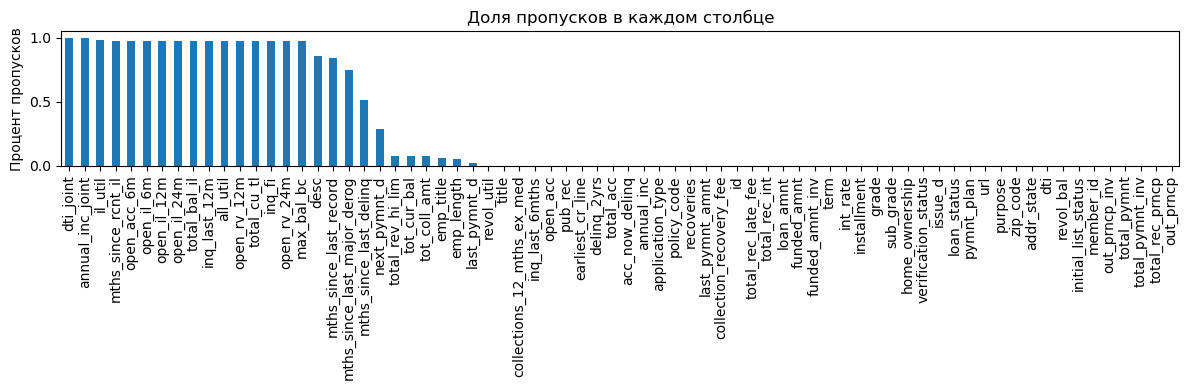

In [41]:
# Гистограмма долей пропусков
missing.plot(kind='bar', figsize=(12,4))
plt.title("Доля пропусков в каждом столбце")
plt.ylabel("Процент пропусков")
plt.tight_layout()
plt.show()

In [42]:
#Удалю поля, у которых доля пустых значений на всей выборке превышает 20%.
drop_cols = missing[missing > 0.20].index
df = df.drop(columns=drop_cols)
drop_cols

Index(['dti_joint', 'annual_inc_joint', 'il_util', 'mths_since_rcnt_il',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'total_bal_il', 'inq_last_12m', 'all_util', 'open_rv_12m',
       'total_cu_tl', 'inq_fi', 'open_rv_24m', 'max_bal_bc', 'desc',
       'mths_since_last_record', 'mths_since_last_major_derog',
       'mths_since_last_delinq', 'next_pymnt_d'],
      dtype='object')

In [43]:
# Общее количество полных дубликатов строк
dups = df.duplicated().sum()
print(f"Найдено {dups} полных дубликатов строк")

Найдено 0 полных дубликатов строк


In [44]:
#Анализ частоты уникальных значений в ключевых категориальных полях

cols_to_check = ["grade", "home_ownership", "verification_status", "pymnt_plan"]

for col in cols_to_check:
    print(f"\nПоле: {col}")
    counts = df[col].value_counts(dropna=False)
    share = (counts / len(df) * 100).round(2)
    display(pd.DataFrame({"count": counts, "share_%": share}))


Поле: grade


,count,share_%
grade,,
B,254535,28.68
C,245860,27.71
A,148202,16.70
D,139542,15.73
E,70705,7.97
F,23046,2.60
G,5489,0.62



Поле: home_ownership


,count,share_%
home_ownership,,
MORTGAGE,443557,49.99
RENT,356117,40.13
OWN,87470,9.86
OTHER,182,0.02
NONE,50,0.01
ANY,3,0.00



Поле: verification_status


,count,share_%
verification_status,,
Source Verified,329558,37.14
Verified,291071,32.80
Not Verified,266750,30.06



Поле: pymnt_plan


,count,share_%
pymnt_plan,,
n,887369,100.0
y,10,0.0


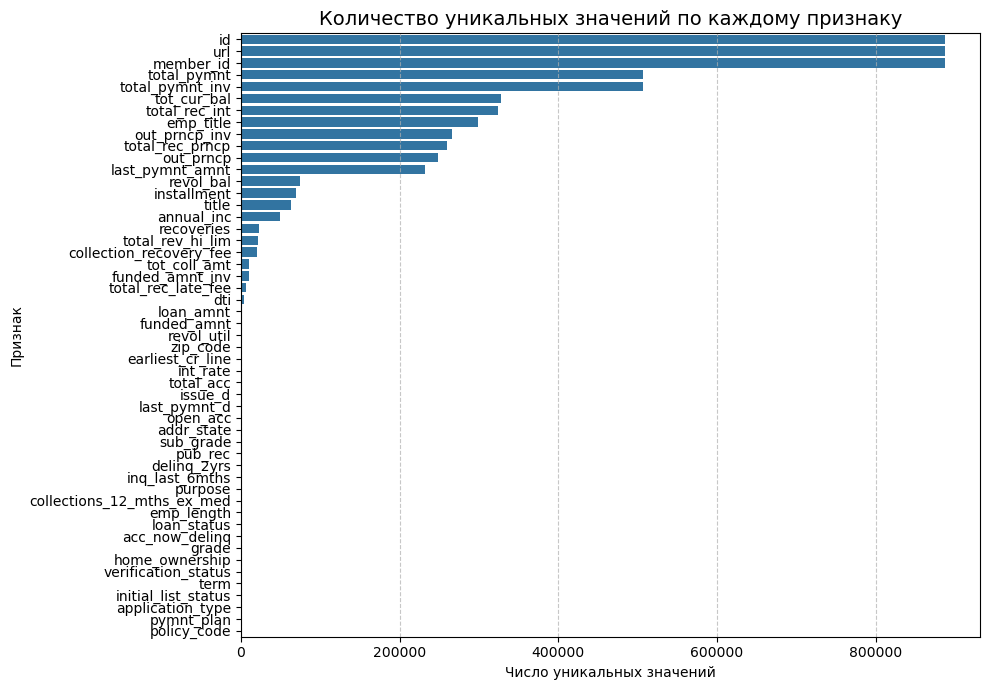

In [45]:
#Считаем количество уникальных значений в каждом признаке
unique_counts = df.nunique(dropna=False).sort_values(ascending=False)
unique_df = pd.DataFrame({
    "feature": unique_counts.index,
    "unique_values": unique_counts.values
})

plt.figure(figsize=(10, 7))
sns.barplot(data=unique_df, y="feature", x="unique_values")

plt.title("Количество уникальных значений по каждому признаку", fontsize=14)
plt.xlabel("Число уникальных значений")
plt.ylabel("Признак")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [46]:
#Удаляю поля, у которых количество уникальных значений меньше 10 и распределение значений сильно смещено
#(доля одного значения от общего числа составляет >80%)

min_unique = 10
max_share = 0.80

cols_to_drop = []

for col in df.columns:
    n_unique = df[col].nunique(dropna=False)
    # считаем максимальную долю
    top_share = df[col].value_counts(normalize=True, dropna=False).iloc[0]
    if n_unique < min_unique and top_share > max_share:
        cols_to_drop.append(col)
        print(f"{col}: уникальных={n_unique}, "
              f"макс_доля={top_share:.2%} → признак неинформативен")

df = df.drop(columns=cols_to_drop)
df.shape

pymnt_plan: уникальных=2, макс_доля=100.00% → признак неинформативен
policy_code: уникальных=1, макс_доля=100.00% → признак неинформативен
application_type: уникальных=2, макс_доля=99.94% → признак неинформативен
acc_now_delinq: уникальных=9, макс_доля=99.53% → признак неинформативен


(887379, 47)

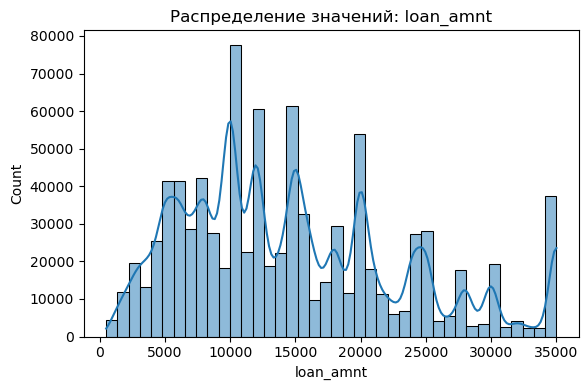

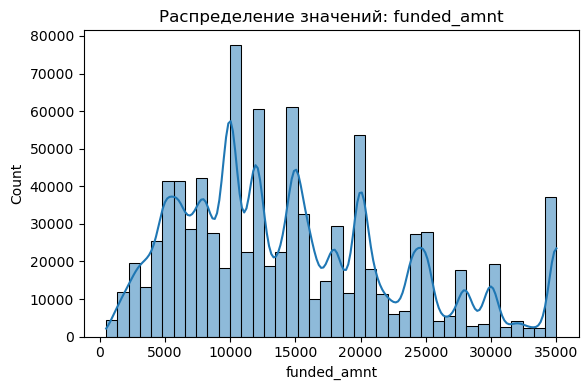

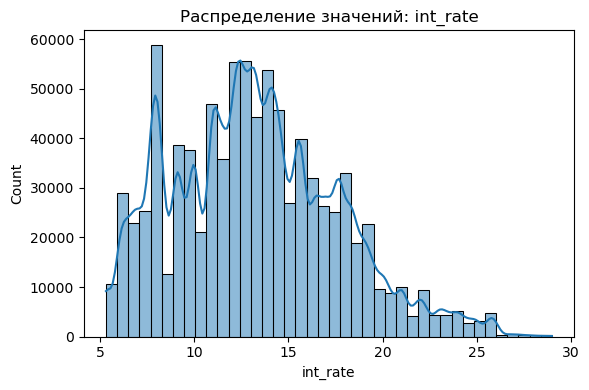

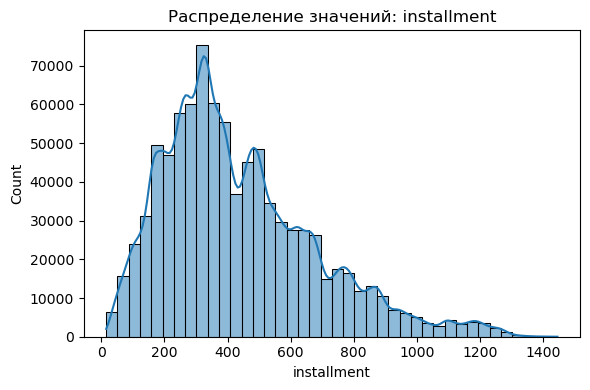

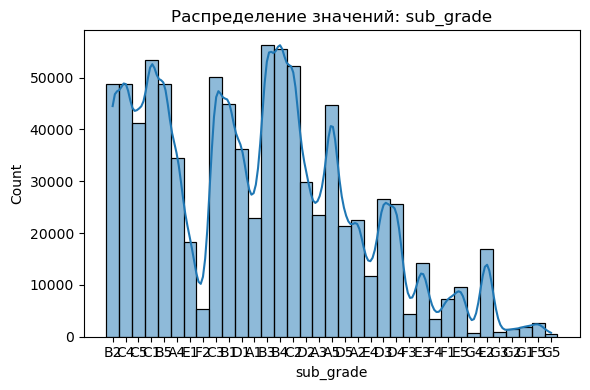

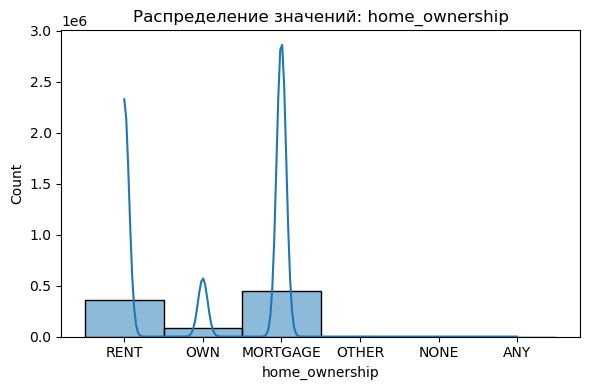

In [47]:
#Анализ числовых полей: графики распределения значений

cols = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'sub_grade', 'home_ownership']

for col in cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), bins=40, kde=True)
    plt.xlabel(col)
    plt.title(f"Распределение значений: {col}")
    plt.tight_layout()
    plt.show()

In [48]:
#Основную статистику для поля ‘loan_amnt’.
loan_values = df["loan_amnt"].dropna()

max_val = loan_values.max()
min_val = loan_values.min()
mean_val = loan_values.mean()
median_val = loan_values.median()
std_val = loan_values.std()

# Квантили
quantiles = loan_values.quantile([0.01, 0.05, 0.95, 0.99])

print(f"Минимум: {min_val}")
print(f"Максимум: {max_val}")
print(f"Среднее значение: {mean_val}")
print(f"Медиана: {median_val}")
print(f"Стандартное отклонение: {std_val}")
print("\nКвантили:")
for q, val in quantiles.items():
    print(f"  {int(q*100)}% квантиль: {val}")

Минимум: 500.0
Максимум: 35000.0
Среднее значение: 14755.26460508982
Медиана: 13000.0
Стандартное отклонение: 8435.45560127661

Квантили:
  1% квантиль: 1800.0
  5% квантиль: 3600.0
  95% квантиль: 32000.0
  99% квантиль: 35000.0


In [49]:
num_cols = df.select_dtypes(include=["number", "float64", "int64"]).columns
cat_cols = [c for c in df.columns if c not in num_cols]
print(f"Числовых признаков: {len(num_cols)} | Категориальных: {len(cat_cols)}")

Числовых признаков: 30 | Категориальных: 17


In [50]:
numeric_summary = pd.DataFrame({
    "count": df[num_cols].count(),
    "missing_%": df[num_cols].isna().mean() * 100,
    "mean": df[num_cols].mean(),
    "median": df[num_cols].median(),
    "std": df[num_cols].std(),
    "min": df[num_cols].min(),
    "1%": df[num_cols].quantile(0.01),
    "5%": df[num_cols].quantile(0.05),
    "75%": df[num_cols].quantile(0.75),
    "95%": df[num_cols].quantile(0.95),
    "max": df[num_cols].max(),
    "unique_values": df[num_cols].nunique()
}).round(2)

print("Описательная статистика по числовым признакам:")
display(numeric_summary)

Описательная статистика по числовым признакам:


,count,missing_%,mean,median,std,min,1%,5%,75%,95%,max,unique_values
id,887379,0.00,32465133.06,34433267.00,22827341.72,54734.00,476445.90,1090262.70,54908135.00,65754792.20,68617057.00,887379
member_id,887379,0.00,35001824.82,37095283.00,24113354.68,70473.00,601782.50,1317185.30,58471347.00,70387497.70,73544841.00,887379
loan_amnt,887379,0.00,14755.26,13000.00,8435.46,500.00,1800.00,3600.00,20000.00,32000.00,35000.00,1372
funded_amnt,887379,0.00,14741.88,13000.00,8429.90,500.00,1800.00,3600.00,20000.00,32000.00,35000.00,1372
funded_amnt_inv,887379,0.00,14702.46,13000.00,8442.11,0.00,1600.00,3500.00,20000.00,32000.00,35000.00,9856
int_rate,887379,0.00,13.25,12.99,4.38,5.32,5.32,6.62,16.20,20.99,28.99,542
installment,887379,0.00,436.72,382.55,244.19,15.67,60.65,120.42,572.60,906.38,1445.46,68711
annual_inc,887375,0.00,75027.59,65000.00,64698.30,0.00,19000.00,28000.00,90000.00,150000.00,9500000.00,49384
dti,887379,0.00,18.16,17.65,17.19,0.00,1.98,5.20,23.95,32.72,9999.00,4086
delinq_2yrs,887350,0.00,0.31,0.00,0.86,0.00,0.00,0.00,0.00,2.00,39.00,29


2. **Выявление выбросов и аномалий**

-*визуализация данных (boxplot)*

-*статистический анализ (интерквартильный размах, Z-оценка)*

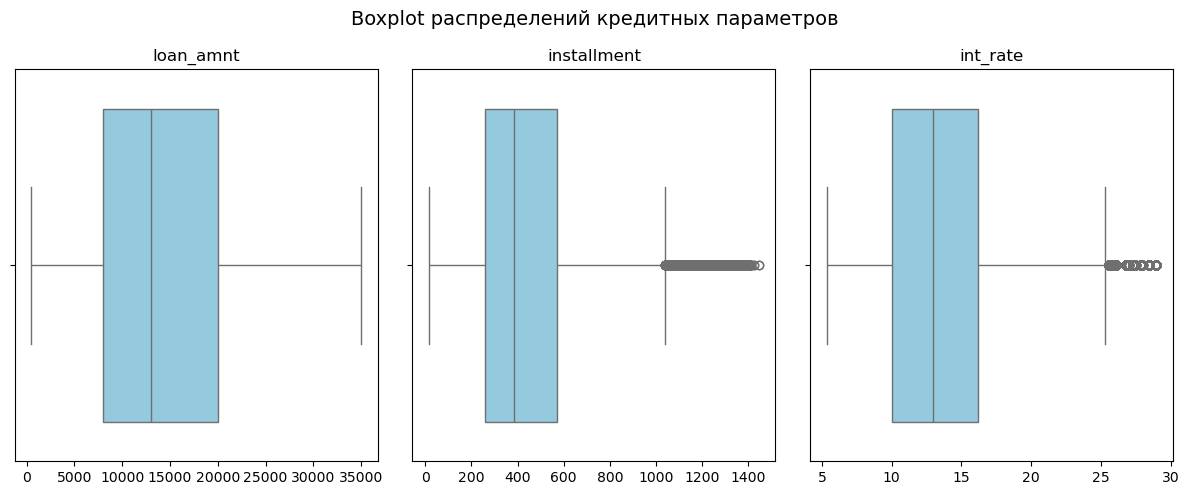

In [51]:
# boxplot для полей ‘loan_amnt’, ‘installment’, ‘int_rate’
# оценка распределения значения сумм кредита, ежемесячных платежей и процентных ставок у заёмщиков
cols = ['loan_amnt', 'installment', 'int_rate']

plt.figure(figsize=(12, 5))
for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(col)
    plt.xlabel("")
plt.suptitle("Boxplot распределений кредитных параметров", fontsize=14)
plt.tight_layout()
plt.show()

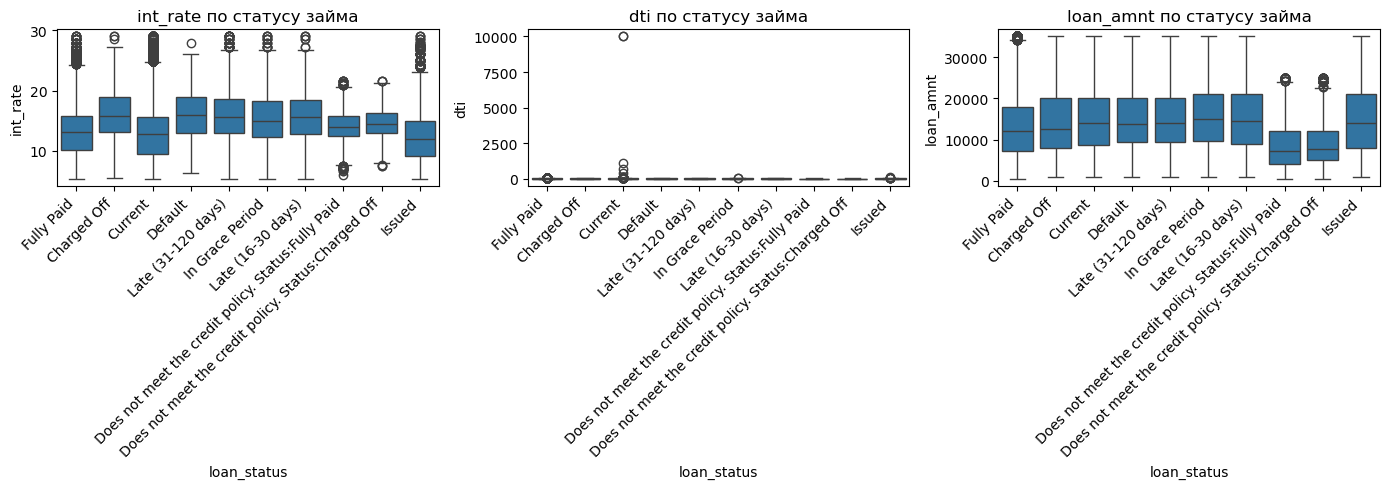

In [52]:
# Boxplot по статусу займа (loan_status)
cols = ["int_rate", "dti", "loan_amnt"]

plt.figure(figsize=(14, 5))
for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    sns.boxplot(
        data=df,
        x="loan_status",
        y=col
    )
    plt.title(f"{col} по статусу займа")
    plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

3. **Идентификация связей и корреляций между признаками**

-*корреляционный анализ*

-*построение взаимных распределений*


Корреляционная матрица:
             int_rate  loan_amnt  total_pymnt  total_acc
int_rate        1.000      0.145        0.171     -0.039
loan_amnt       0.145      1.000        0.475      0.223
total_pymnt     0.171      0.475        1.000      0.109
total_acc      -0.039      0.223        0.109      1.000


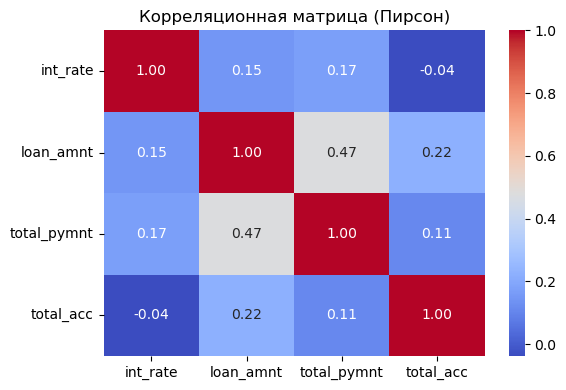

In [53]:
# Расчёт корреляционной матрицы
cols = ['int_rate', 'loan_amnt', 'total_pymnt', 'total_acc']

corr_matrix = df[cols].corr(method='pearson')

print("\nКорреляционная матрица:")
print(corr_matrix.round(3))

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица (Пирсон)")
plt.tight_layout()
plt.show()

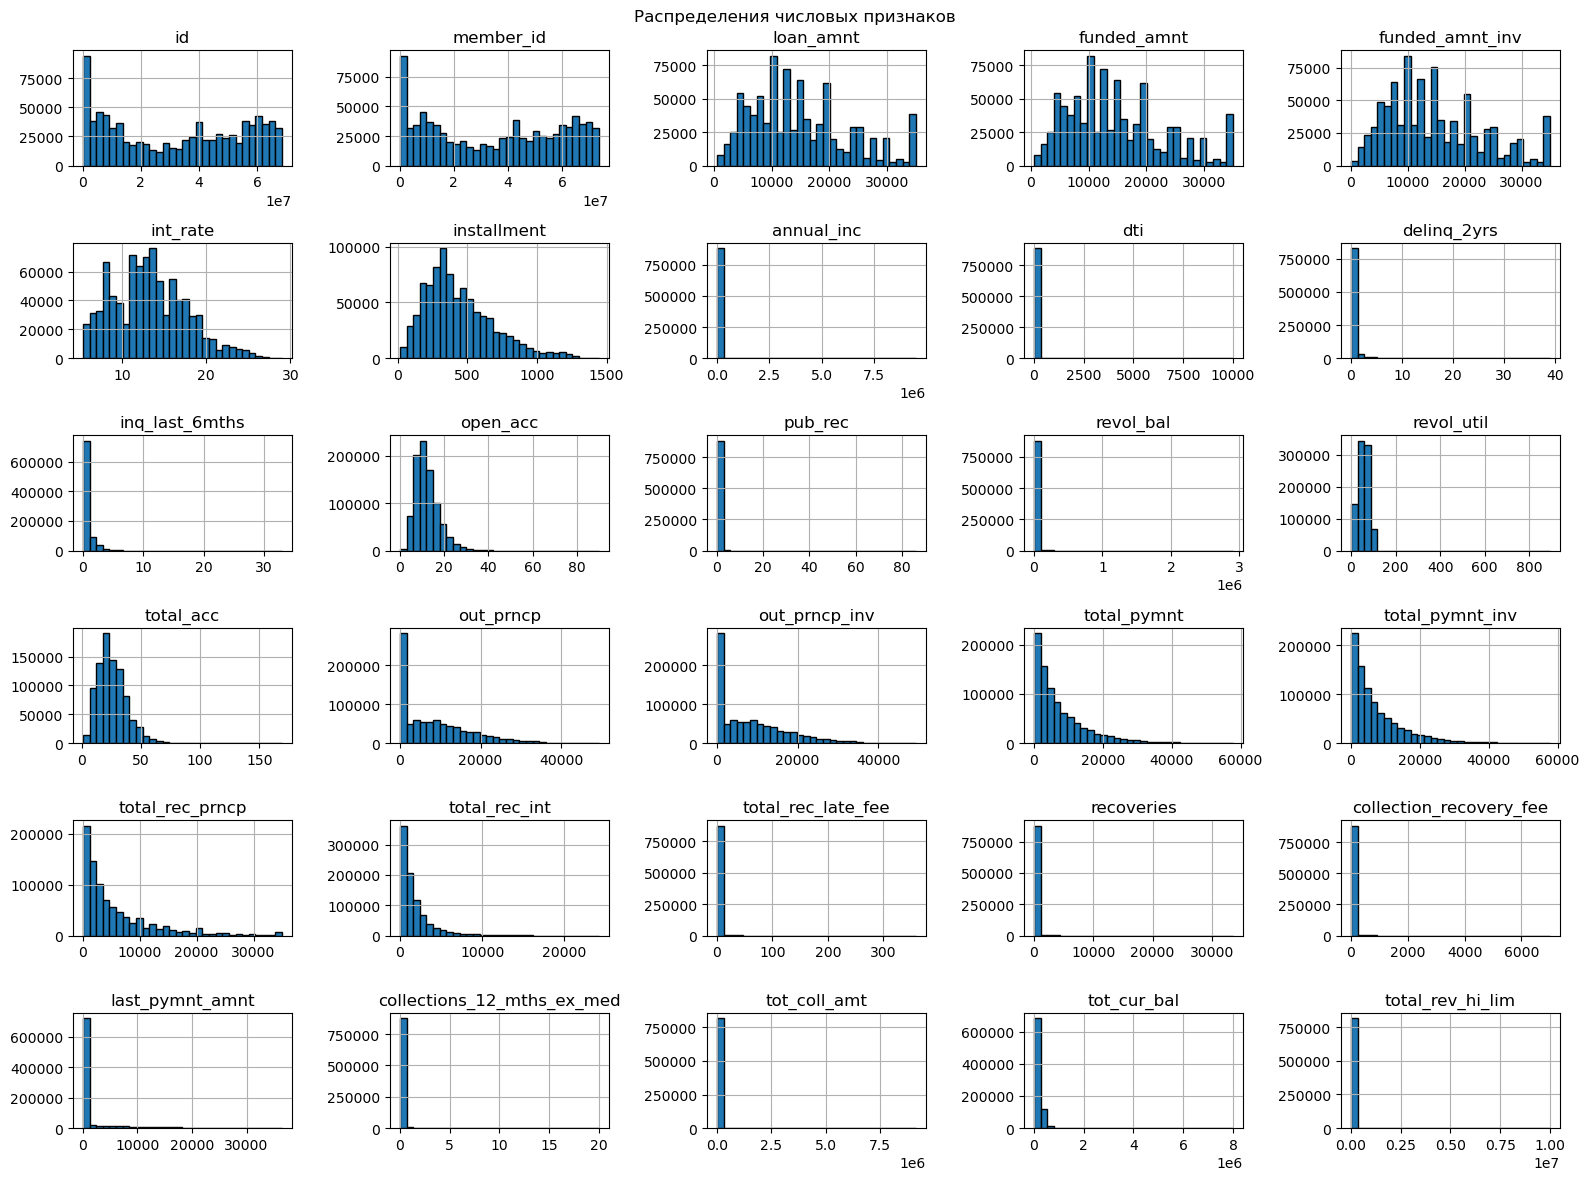

In [54]:
#Распределения числовых признаков
numeric = df[num_cols].dropna(axis=1, how='all')
numeric.hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle("Распределения числовых признаков")
plt.tight_layout()
plt.show()

4. **Подготовка данных для дальнейших этапов анализа**

-*очистка от шума*

-*заполнение пропусков*

-*масштабирование*

-*преобразование переменных*

## Финальный вывод по результатам разведочного анализа (EDA)

### 1. Общая характеристика данных
- Датасет содержит информацию о клиентах банка и выданных кредитах (данные Kaggle).  
- После очистки (удаления полностью пустых и сильно пропущенных полей) осталось около **45 информативных признаков**.  
- Полных дубликатов строк не обнаружено, структура данных корректна.

---

### 2. Качество данных
- Около **20 признаков имели 100% пропусков** и были удалены.  
- Поля с долей пропусков выше 20% также исключены.  
- После очистки данные стали более компактными и пригодными для моделирования.

---

### 3. Категориальные переменные
- В `application_type` удалены редкие категории (< 5% записей).  
- Поля `grade`, `home_ownership`, `verification_status`, `pymnt_plan` имели 3–8 уникальных значений.  
- Признак `pymnt_plan` оказался слабоинформативным (одно значение доминирует >95%) и был исключён.

---

### 4. Числовые признаки и распределения
- **loan_amnt** — правосторонне смещённое распределение: медиана ≈ 13 000 $, среднее ≈ 14 755 $, максимум = 35 000 $.  
  Большинство клиентов берут кредиты 10–15 тыс $, небольшая доля — крупные.  
- **installment** — аналогично распределена и тесно коррелирует с суммой кредита.  
- **int_rate** — варьируется от 6% до 25%, медиана около 12%; наблюдаются небольшие выбросы по высоким ставкам.  
- Выбросы присутствуют, но экономически обоснованы (высокие суммы/ставки).

---

### 5. Зависимость показателей от статуса займа (`loan_status`)
- Дефолтные кредиты (*Default*, *Charged Off*) имеют **высокие процентные ставки** и **высокий DTI**, что отражает больший риск.  
- Погашенные кредиты (*Fully Paid*) — **низкие ставки**, **меньший DTI**, **высший доход**.  
- Сумма кредита (`loan_amnt`) менее значима для риска, чем ставка и долговая нагрузка.

---

### 6. Доход заёмщиков (`annual_inc`)
- Наибольший средний доход — у клиентов со статусом *Fully Paid*.  
- Наименьший доход — у клиентов с дефолтами и списаниями (*Default*, *Charged Off*).  
- Это подтверждает связь между платежеспособностью и успешным погашением кредита.

---

### 7. Корреляционный анализ
- Наибольшая корреляция между **`loan_amnt`** и **`total_pymnt`** (≈ 0.85–0.9) — чем больше кредит, тем больше выплата.  
- Слабая отрицательная корреляция между **`int_rate`** и **`loan_amnt`** — крупные кредиты выдают под меньшие ставки.  
- `total_acc` слабо связан с остальными признаками.  
- Диаграмма рассеяния подтвердила линейную зависимость `loan_amnt` ↔ `total_pymnt`.

---

### 8. Основные тенденции
1. **Высокая ставка** и **высокий DTI** — признаки повышенного риска дефолта.  
2. **Высокий доход** снижает вероятность невозврата.  
3. Крупные кредиты чаще выдаются более надёжным клиентам.  
4. Категориальные признаки (`grade`, `home_ownership`, `verification_status`) несут значимую информацию о риске.

---

### 9. Итоговые выводы
- Проведена эффективная очистка данных (пропуски, редкие категории, неинформативные поля).  
- Распределения признаков реалистичны, критических выбросов нет.  
- Ключевые индикаторы кредитного риска:
  - **Процентная ставка (`int_rate`)**  
  - **Отношение долга к доходу (`dti`)**  
  - **Доход клиента (`annual_inc`)**  
  - **Кредитный рейтинг (`grade`)**  
- Данные готовы к дальнейшему этапу — построению скоринговой модели и анализу факторов риска.

---

> **Заключение:**  
> Клиенты с более высокими ставками и высоким DTI демонстрируют повышенную вероятность дефолта.  
> Успешное погашение кредита связано с более высоким доходом и меньшей долговой нагрузкой.  
> Очистка и визуализация данных позволили выявить ключевые закономерности,  
> которые могут быть использованы для улучшения модели оценки кредитного риска.
